In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
# pd.set_option(max_column)

In [117]:
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [118]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [119]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [120]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [121]:
df.shape

(48895, 16)

# Missing Data Handling

In [122]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [123]:
df.duplicated().sum()

0

In [124]:
# Drop rows with any null values
df.dropna(inplace=True)
df.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [125]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000
mean,40.728129,-73.951149,142.332526,5.869220,29.290255,2018-10-04 07:23:47.072975872,1.373229,5.166611,114.886299
min,40.506410,-74.244420,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,40.688640,-73.982460,69.000000,1.000000,3.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000
75%,40.762990,-73.935020,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,0.054991,0.046693,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950


# Price Distribution (Log Scale)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


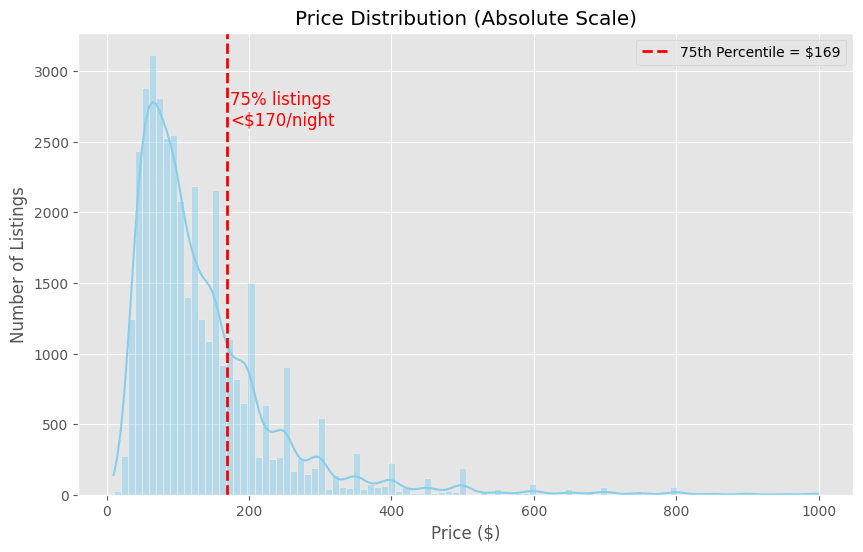

In [126]:
df = df[df['price'] >0]
df = df[df['price'] < 1000]

# Calculate 75th percentile
p75 = df['price'].quantile(0.75)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True, color='skyblue')
plt.axvline(p75, color='red', linestyle='--', linewidth=2, label=f'75th Percentile = ${p75:.0f}')
plt.text(p75 + 5, plt.ylim()[1]*0.8, '75% listings\n<$170/night', color='red', fontsize=12)
plt.title("Price Distribution (Absolute Scale)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.legend()
plt.show()


In [127]:
import folium
from folium.plugins import MarkerCluster

# Sample 500 listings for faster map rendering
sample_df = df.sample(500)

# Create NYC-centered map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
marker_cluster = MarkerCluster().add_to(nyc_map)

# Add markers to map
for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"${row['price']} | {row['room_type']}",
        color='green' if row['room_type'] == 'Entire home/apt' else
               'blue' if row['room_type'] == 'Private room' else
               'red',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Save map
nyc_map.save("nyc_airbnb_roomtype_map.html")
print("Map saved as nyc_airbnb_roomtype_map.html")
from IPython.display import IFrame

IFrame('nyc_airbnb_roomtype_map.html', width=800, height=600)



Map saved as nyc_airbnb_roomtype_map.html


/tmp/ipykernel_33/363980510.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='availability_range', columns='price_range', values='id', aggfunc='count')


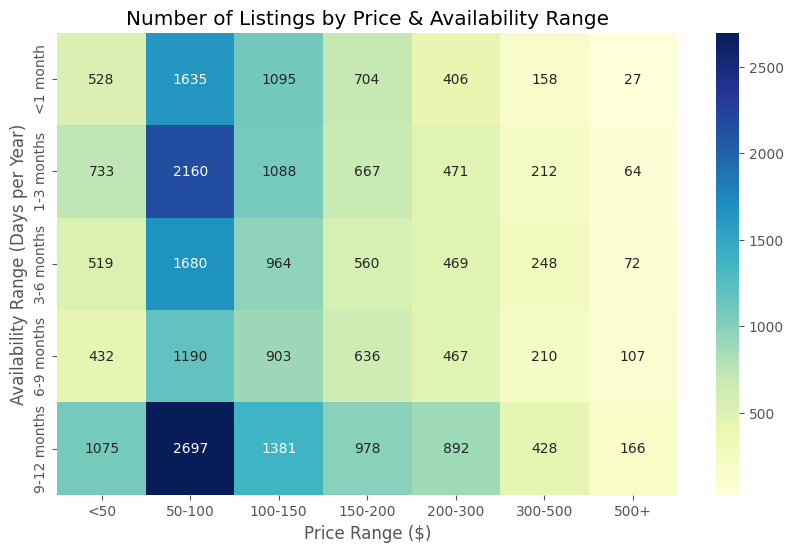

In [128]:
# Remove outliers again if not already done
df_filtered = df[(df['price'] < 1000) & (df['availability_365'] > 0)]

# Define price buckets
price_bins = [0, 50, 100, 150, 200, 300, 500, 1000]
price_labels = ['<50', '50-100', '100-150', '150-200', '200-300', '300-500', '500+']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Define availability buckets
avail_bins = [0, 30, 90, 180, 270, 365]
avail_labels = ['<1 month', '1-3 months', '3-6 months', '6-9 months', '9-12 months']
df['availability_range'] = pd.cut(df['availability_365'], bins=avail_bins, labels=avail_labels)
# Pivot table
pivot = df.pivot_table(index='availability_range', columns='price_range', values='id', aggfunc='count')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Number of Listings by Price & Availability Range")
plt.xlabel("Price Range ($)")
plt.ylabel("Availability Range (Days per Year)")
plt.show()


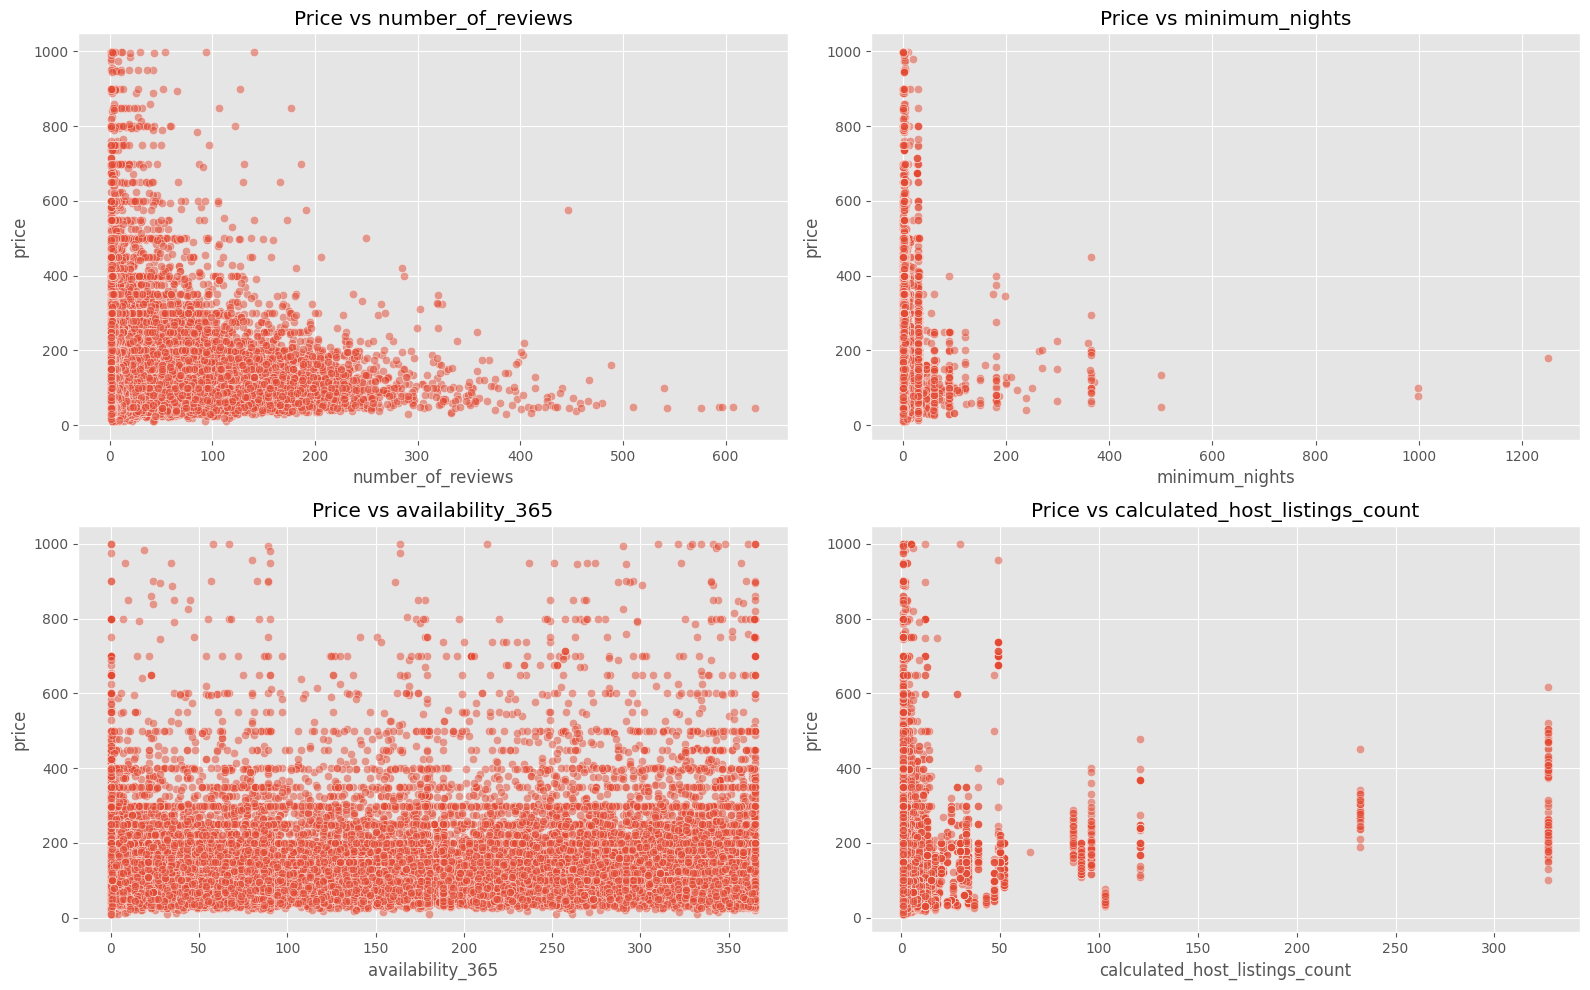

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out extreme prices for better visualization
df_filtered = df[df['price'] < 1000]

features = ['number_of_reviews', 'minimum_nights', 'availability_365', 'calculated_host_listings_count']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df_filtered, x=feature, y='price', alpha=0.5)
    plt.title(f"Price vs {feature}")
    plt.grid(True)

plt.tight_layout()
plt.show()


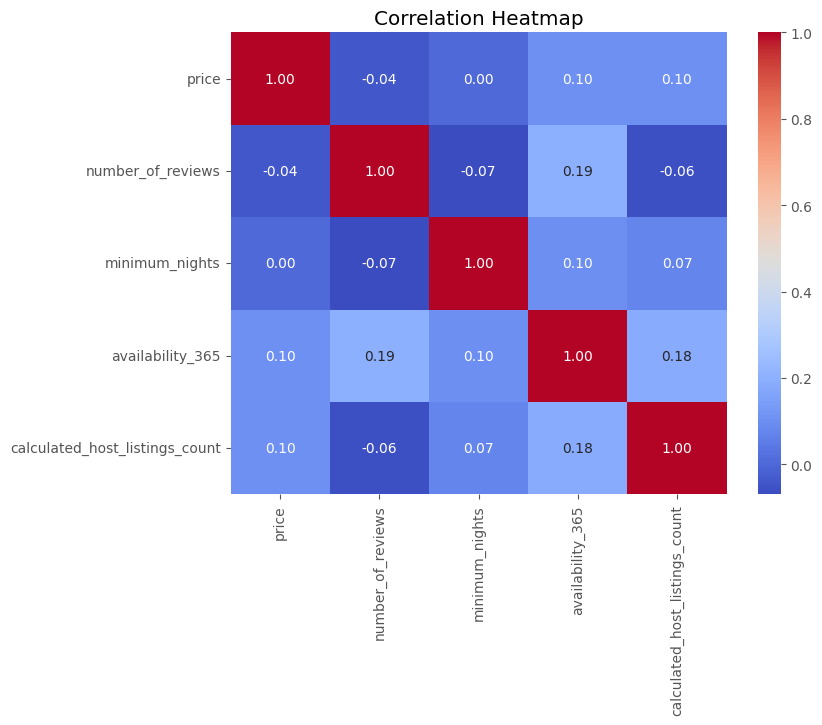

In [130]:
# Compute correlation matrix for selected numeric features
corr_features = df[['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'calculated_host_listings_count']]
corr_matrix = corr_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [131]:
# Group by neighbourhood_group
grouped_ng = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'id': 'count',  # Number of listings
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
}).rename(columns={'id': 'number_of_listings'}).reset_index()

print("Top performing by neighbourhood_group:")
print(grouped_ng)

# Group by neighbourhood (top 10 for readability)
grouped_nh = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'id': 'count',
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
}).rename(columns={'id': 'number_of_listings'}).reset_index()

top_10_neighbourhoods = grouped_nh.sort_values('number_of_listings', ascending=False).head(10)
print("\nTop 10 neighbourhoods by number of listings:")
print(top_10_neighbourhoods)


Top performing by neighbourhood_group:
  neighbourhood_group       price  number_of_listings  number_of_reviews  \
0               Bronx   79.649886                 874              28279   
1            Brooklyn  117.159990               16401             485459   
2           Manhattan  168.874137               16518             452498   
3              Queens   92.242829                4567             156886   
4       Staten Island   89.964968                 314              11541   

   availability_365  
0        171.156751  
1        105.673496  
2        108.602797  
3        150.502956  
4        205.640127  

Top 10 neighbourhoods by number of listings:
          neighbourhood       price  number_of_listings  number_of_reviews  \
212        Williamsburg  138.719126                3158              85397   
13   Bedford-Stuyvesant  101.469179                3131             109852   
93               Harlem  112.815909                2200              75870   
28            

In [132]:
import folium
from folium.plugins import HeatMap

# Prepare data for heatmaps (use sample for performance)
sample_df = df.sample(1000, random_state=42)

# 1) Density Heatmap (number of listings density)
density_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
density_data = sample_df[['latitude', 'longitude']].values.tolist()
HeatMap(density_data).add_to(density_map)
density_map.save("nyc_density_heatmap.html")
print("Density heatmap saved as nyc_density_heatmap.html")

# 2) Average Price Heatmap
# Create weighted points with price as intensity
price_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
price_data = sample_df[['latitude', 'longitude', 'price']].values.tolist()
HeatMap(price_data, radius=15, max_val=sample_df['price'].max(), blur=20).add_to(price_map)
price_map.save("nyc_price_heatmap.html")
print("Price heatmap saved as nyc_price_heatmap.html")

# 3) Reviews per Month Heatmap (proxy for satisfaction/activity)
reviews_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
reviews_data = sample_df[['latitude', 'longitude', 'reviews_per_month']].dropna().values.tolist()
HeatMap(reviews_data, radius=15, max_val=sample_df['reviews_per_month'].max(), blur=20).add_to(reviews_map)
reviews_map.save("nyc_reviews_heatmap.html")
print("Reviews heatmap saved as nyc_reviews_heatmap.html")


Density heatmap saved as nyc_density_heatmap.html
Price heatmap saved as nyc_price_heatmap.html
Reviews heatmap saved as nyc_reviews_heatmap.html


/tmp/ipykernel_33/736766795.py:18: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(price_data, radius=15, max_val=sample_df['price'].max(), blur=20).add_to(price_map)
/tmp/ipykernel_33/736766795.py:25: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(reviews_data, radius=15, max_val=sample_df['reviews_per_month'].max(), blur=20).add_to(reviews_map)


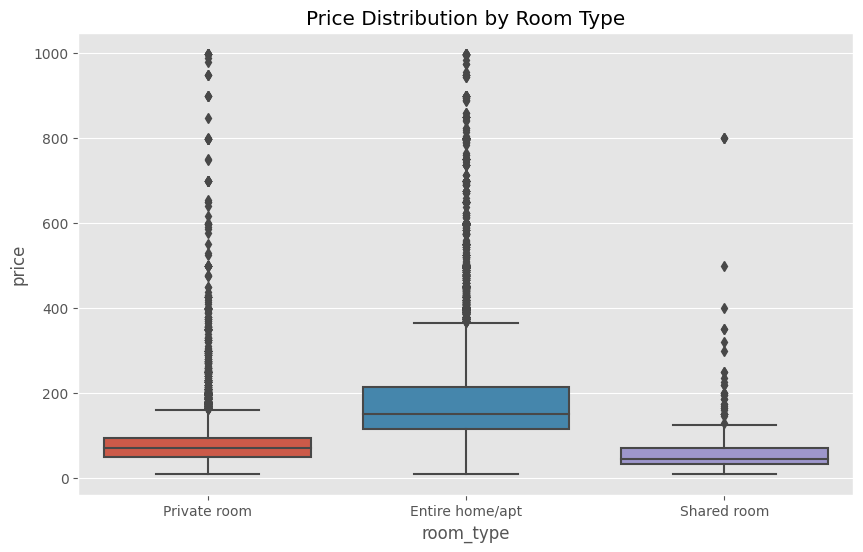

Average Availability by Room Type:
         room_type  availability_365
0  Entire home/apt        110.676305
1     Private room        116.446694
2      Shared room        165.914489


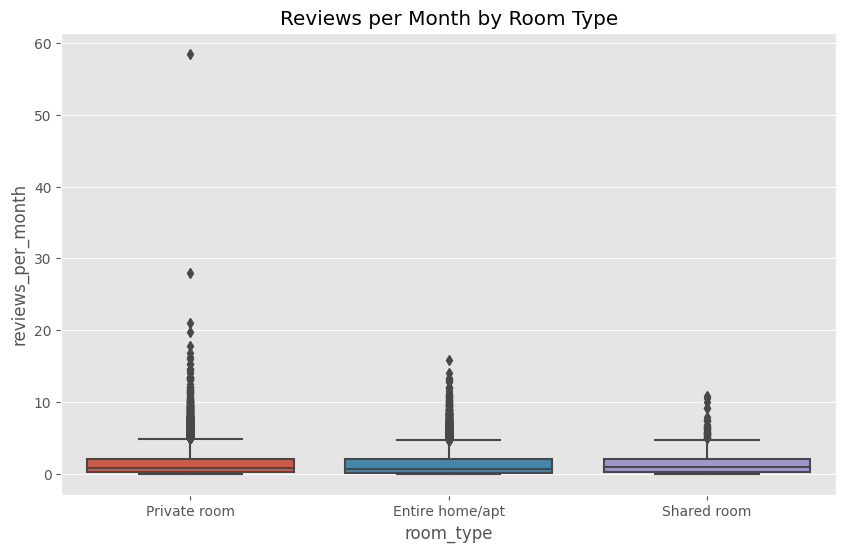

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Price by room_type (filter extreme prices)
df_filtered = df[df['price'] < 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_filtered)
plt.title('Price Distribution by Room Type')
plt.show()

# Booking trends: Average availability_365 by room_type
availability_by_room = df.groupby('room_type')['availability_365'].mean().reset_index()
print("Average Availability by Room Type:")
print(availability_by_room)

# Reviews per month by room_type (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='reviews_per_month', data=df.dropna(subset=['reviews_per_month']))
plt.title('Reviews per Month by Room Type')
plt.show()


/tmp/ipykernel_33/1717567886.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[319.5 174.6   0.  ...  78.3  36.    0.9]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['AB_group'] == 'B', 'availability_365'] = df.loc[df['AB_group'] == 'B', 'availability_365'] * 0.9


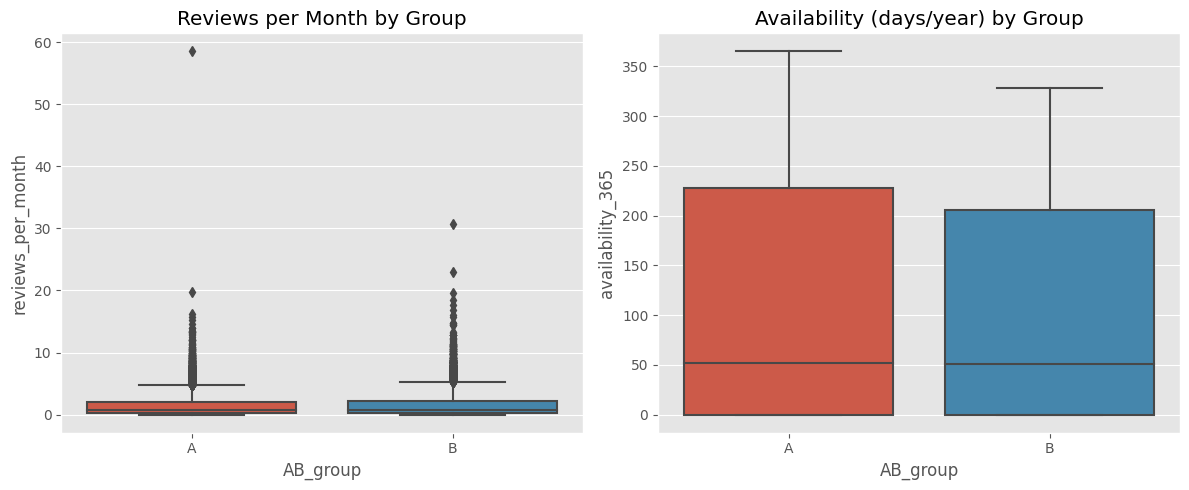

T-test Reviews per Month: t=-8.014, p=0.000
T-test Availability 365: t=8.041, p=0.000


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Simulate A/B groups randomly (50% each)
np.random.seed(42)
df['AB_group'] = np.random.choice(['A', 'B'], size=len(df), p=[0.5, 0.5])

# Hypothetical effect: Group B has better UX, so:
# - Higher reviews_per_month (+10% assumed)
# - Lower availability_365 (more bookings, so availability drops by 10%)

df.loc[df['AB_group'] == 'B', 'reviews_per_month'] = df.loc[df['AB_group'] == 'B', 'reviews_per_month'] * 1.1
df.loc[df['AB_group'] == 'B', 'availability_365'] = df.loc[df['AB_group'] == 'B', 'availability_365'] * 0.9

# Drop NA for reviews_per_month before analysis
df_ab = df.dropna(subset=['reviews_per_month'])

# Compare reviews_per_month between groups
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='AB_group', y='reviews_per_month', data=df_ab)
plt.title('Reviews per Month by Group')

# Compare availability_365 between groups
plt.subplot(1, 2, 2)
sns.boxplot(x='AB_group', y='availability_365', data=df_ab)
plt.title('Availability (days/year) by Group')

plt.tight_layout()
plt.show()

# Statistical test: t-test for difference in means
reviews_A = df_ab[df_ab['AB_group'] == 'A']['reviews_per_month']
reviews_B = df_ab[df_ab['AB_group'] == 'B']['reviews_per_month']

avail_A = df_ab[df_ab['AB_group'] == 'A']['availability_365']
avail_B = df_ab[df_ab['AB_group'] == 'B']['availability_365']

t_reviews, p_reviews = ttest_ind(reviews_A, reviews_B, equal_var=False)
t_avail, p_avail = ttest_ind(avail_A, avail_B, equal_var=False)

print(f"T-test Reviews per Month: t={t_reviews:.3f}, p={p_reviews:.3f}")
print(f"T-test Availability 365: t={t_avail:.3f}, p={p_avail:.3f}")


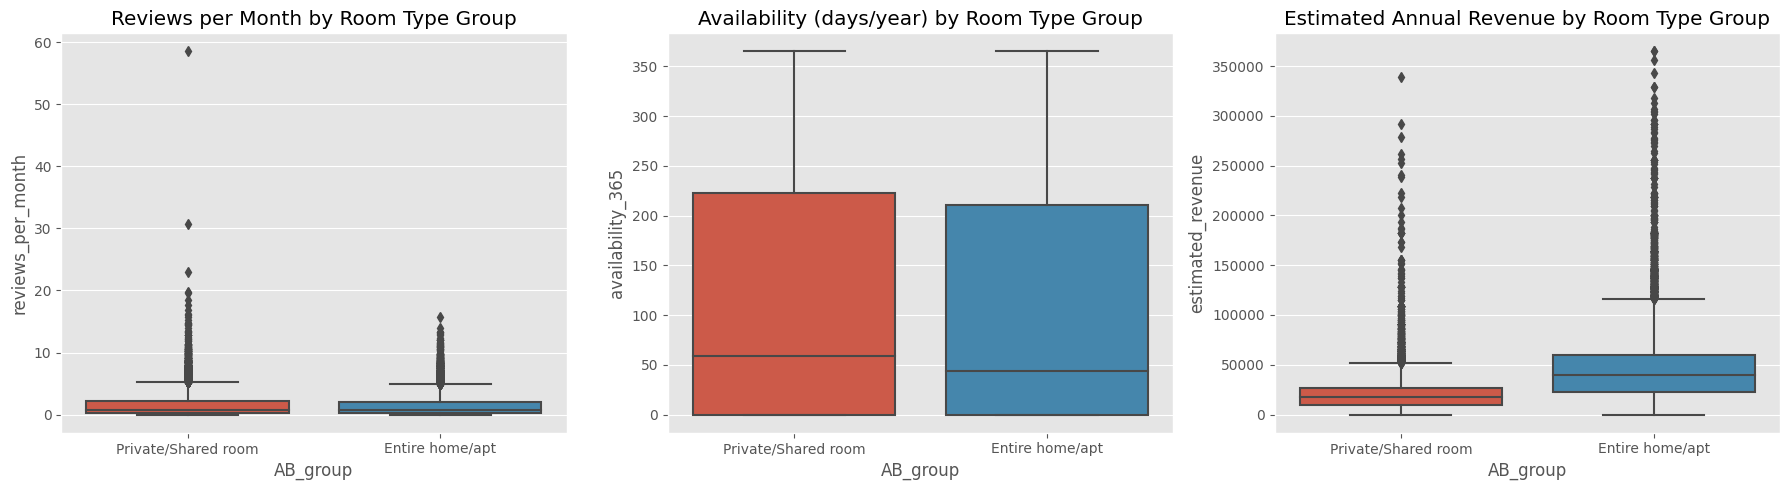

T-test Reviews per Month: t=-7.975, p=0.000
T-test Availability 365: t=-6.033, p=0.000
T-test Estimated Revenue: t=97.978, p=0.000


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define groups based on room_type
df['AB_group'] = df['room_type'].apply(lambda x: 'Entire home/apt' if x == 'Entire home/apt' else 'Private/Shared room')

# Drop NA for relevant columns before analysis
df_ab = df.dropna(subset=['reviews_per_month', 'price', 'availability_365'])

# Calculate estimated annual revenue (price * booked days)
df_ab['estimated_revenue'] = df_ab['price'] * (365 - df_ab['availability_365'])

# Visualize comparisons
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.boxplot(x='AB_group', y='reviews_per_month', data=df_ab)
plt.title('Reviews per Month by Room Type Group')

plt.subplot(1, 3, 2)
sns.boxplot(x='AB_group', y='availability_365', data=df_ab)
plt.title('Availability (days/year) by Room Type Group')

plt.subplot(1, 3, 3)
sns.boxplot(x='AB_group', y='estimated_revenue', data=df_ab)
plt.title('Estimated Annual Revenue by Room Type Group')

plt.tight_layout()
plt.show()

# Statistical tests
reviews_entire = df_ab[df_ab['AB_group'] == 'Entire home/apt']['reviews_per_month']
reviews_private = df_ab[df_ab['AB_group'] == 'Private/Shared room']['reviews_per_month']

avail_entire = df_ab[df_ab['AB_group'] == 'Entire home/apt']['availability_365']
avail_private = df_ab[df_ab['AB_group'] == 'Private/Shared room']['availability_365']

revenue_entire = df_ab[df_ab['AB_group'] == 'Entire home/apt']['estimated_revenue']
revenue_private = df_ab[df_ab['AB_group'] == 'Private/Shared room']['estimated_revenue']

t_reviews, p_reviews = ttest_ind(reviews_entire, reviews_private, equal_var=False)
t_avail, p_avail = ttest_ind(avail_entire, avail_private, equal_var=False)
t_revenue, p_revenue = ttest_ind(revenue_entire, revenue_private, equal_var=False)

print(f"T-test Reviews per Month: t={t_reviews:.3f}, p={p_reviews:.3f}")
print(f"T-test Availability 365: t={t_avail:.3f}, p={p_avail:.3f}")
print(f"T-test Estimated Revenue: t={t_revenue:.3f}, p={p_revenue:.3f}")


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (drop rows with missing values in relevant columns)
df_model = df.dropna(subset=['price', 'availability_365', 'room_type'])

# Calculate estimated revenue
df_model['estimated_revenue'] = df_model['price'] * (365 - df_model['availability_365'])

# One-hot encode room_type
df_encoded = pd.get_dummies(df_model['room_type'], prefix='room')

# Features and targets
X = df_encoded
y_price = df_model['price']
y_revenue = df_model['estimated_revenue']

# Split data into train/test sets for price prediction
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Train Linear Regression model for price
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Predict and evaluate price model
y_pred_price = model_price.predict(X_test_price)
print("Price Prediction Performance:")
print(f"RMSE: {mean_squared_error(y_test_price, y_pred_price, squared=False):.2f}")
print(f"R^2: {r2_score(y_test_price, y_pred_price):.2f}")

# Split data for revenue prediction
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

# Train Linear Regression model for revenue
model_revenue = LinearRegression()
model_revenue.fit(X_train_rev, y_train_rev)

# Predict and evaluate revenue model
y_pred_revenue = model_revenue.predict(X_test_rev)
print("\nRevenue Prediction Performance:")
print(f"RMSE: {mean_squared_error(y_test_rev, y_pred_revenue, squared=False):.2f}")
print(f"R^2: {r2_score(y_test_rev, y_pred_revenue):.2f}")

# Optional: Show coefficients to understand effect of room types
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Price_Coefficient': model_price.coef_,
    'Revenue_Coefficient': model_revenue.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Price Prediction Performance:
RMSE: 94.08
R^2: 0.24

Revenue Prediction Performance:
RMSE: 27640.39
R^2: 0.18

Model Coefficients:
                Feature  Price_Coefficient  Revenue_Coefficient
0  room_Entire home/apt      -4.535103e+13         4.165149e+15
1     room_Private room      -4.535103e+13         4.165149e+15
2      room_Shared room      -4.535103e+13         4.165149e+15


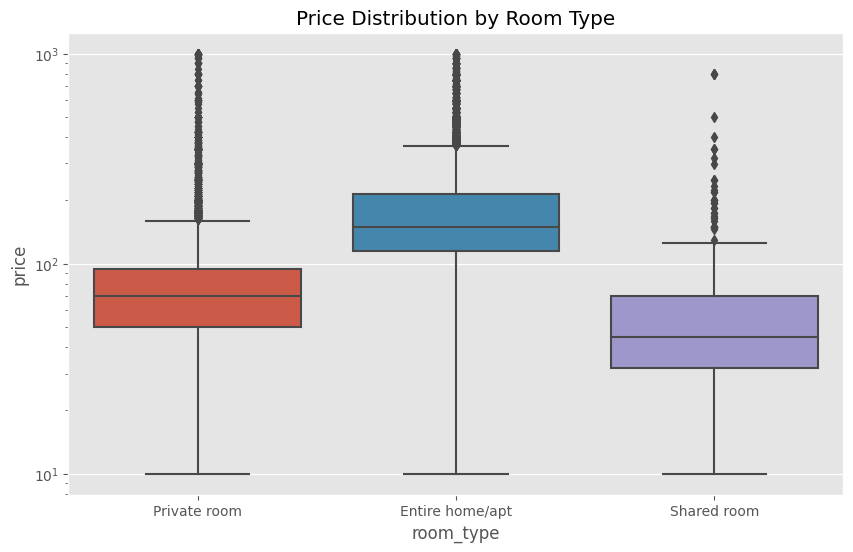

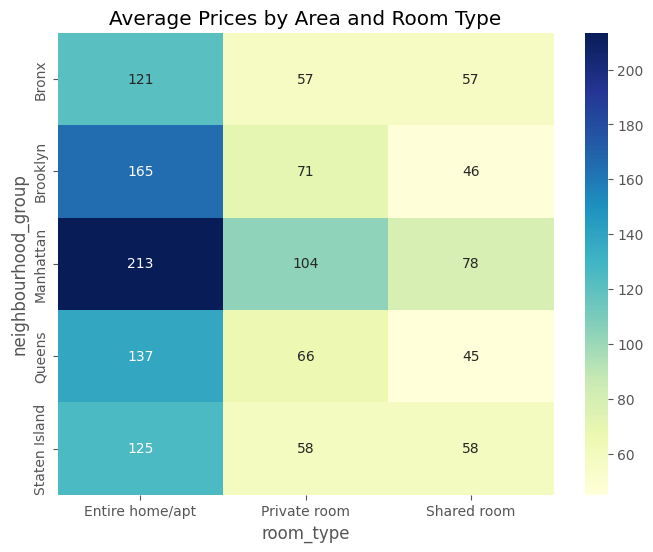

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Price distribution by room_type
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df[df['price'] < 1000])
plt.title('Price Distribution by Room Type')
plt.yscale('log')  # Log scale for better visualization
plt.show()

# Average price by neighbourhood_group and room_type
avg_price_area = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(avg_price_area, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Prices by Area and Room Type')
plt.show()


In [138]:
# Calculate revenue proxy = price * availability_365 (approximate potential revenue)
df['revenue'] = df['price'] * df['availability_365']

# Group by neighbourhood
neighbourhood_stats = df.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    total_listings=('id', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_availability=('availability_365', 'mean'),
    avg_reviews_per_month=('reviews_per_month', 'mean')
).reset_index()

# Top 10 neighbourhoods by revenue
top_neighbourhoods = neighbourhood_stats.sort_values(by='total_revenue', ascending=False).head(10)
print(top_neighbourhoods[['neighbourhood', 'total_revenue', 'total_listings', 'avg_price']])


          neighbourhood  total_revenue  total_listings   avg_price
13   Bedford-Stuyvesant     40244428.1            3131  101.469179
212        Williamsburg     39174565.7            3158  138.719126
126             Midtown     38495505.3             973  248.461459
94       Hell's Kitchen     37904313.2            1524  182.641076
93               Harlem     29210237.6            2200  112.815909
199     Upper East Side     26728674.9            1398  161.332618
200     Upper West Side     25448139.8            1468  167.834469
73   Financial District     22568182.6             509  218.750491
64         East Village     20882544.1            1483  169.280512
34              Chelsea     19188812.5             823  214.098420


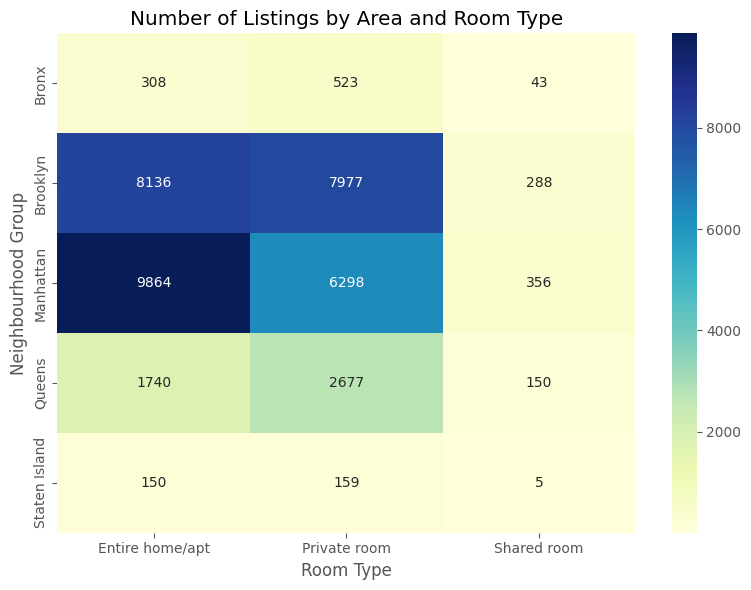

In [139]:
# Filter out listings with non-positive prices
df = df[df['price'] > 0]

# Create a pivot table: number of listings by Neighbourhood Group and Room Type
listing_count_area = df.pivot_table(
    index='neighbourhood_group',
    columns='room_type',
    values='id',
    aggfunc='count'
)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(listing_count_area, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Number of Listings by Area and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()


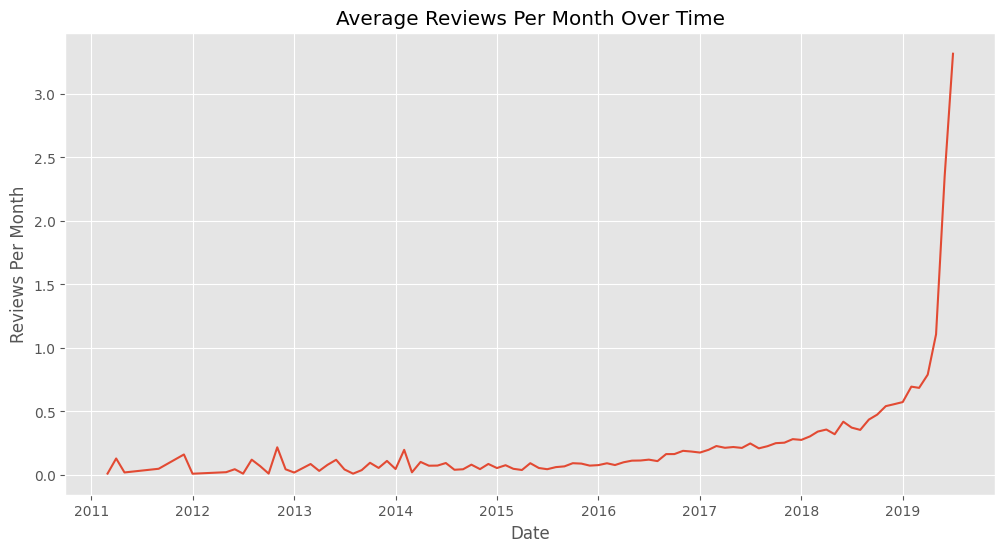

In [140]:
# Convert last_review to datetime if not already
df['last_review'] = pd.to_datetime(df['last_review'])

# Group reviews by month
reviews_time = df.groupby(df['last_review'].dt.to_period('M'))['reviews_per_month'].mean().reset_index()
reviews_time['last_review'] = reviews_time['last_review'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(reviews_time['last_review'], reviews_time['reviews_per_month'])
plt.title('Average Reviews Per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Reviews Per Month')
plt.grid(True)
plt.show()


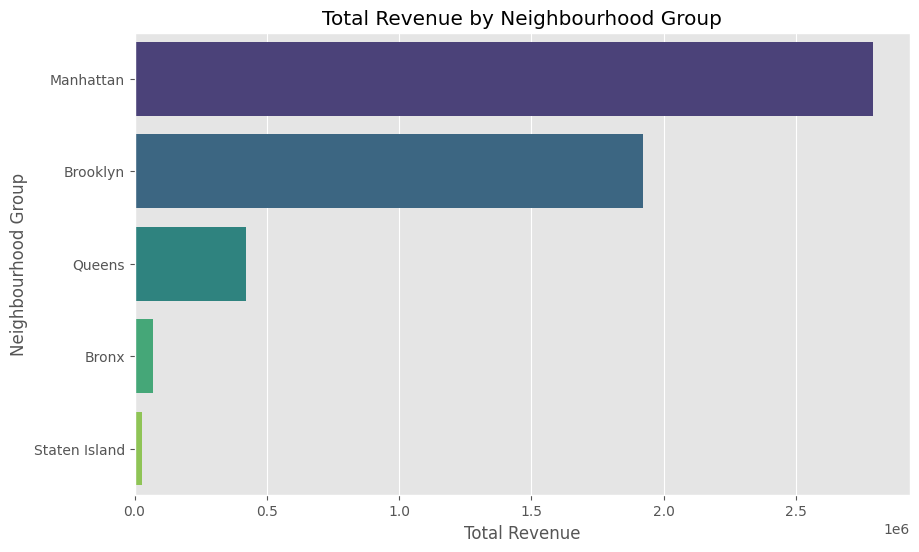

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate total revenue by neighbourhood group
revenue_by_group = df.groupby('neighbourhood_group')['price'].sum().reset_index(name='total_revenue')

# Step 2: Sort descending by revenue (optional)
revenue_by_group = revenue_by_group.sort_values(by='total_revenue', ascending=False)

# Step 3: Plot barplot
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_by_group, x='total_revenue', y='neighbourhood_group', palette='viridis')
plt.title('Total Revenue by Neighbourhood Group')
plt.xlabel('Total Revenue')
plt.ylabel('Neighbourhood Group')
plt.show()


In [142]:
import numpy as np
import scipy.stats as stats

# Randomly assign listings to Group A or Group B (50-50 split)
np.random.seed(42)  # for reproducibility
df['group'] = np.where(np.random.rand(len(df)) < 0.5, 'A_Default', 'B_Enhanced')

# Calculate average reviews_per_month and availability_365 for each group
group_stats = df.groupby('group').agg({
    'reviews_per_month': 'mean',
    'availability_365': 'mean'
}).reset_index()

print(group_stats)

# Statistical test (t-test) to check if difference in means is significant

# Reviews per month t-test
group_a_reviews = df[df['group'] == 'A_Default']['reviews_per_month'].dropna()
group_b_reviews = df[df['group'] == 'B_Enhanced']['reviews_per_month'].dropna()
t_stat_reviews, p_val_reviews = stats.ttest_ind(group_a_reviews, group_b_reviews)

# Availability t-test
group_a_avail = df[df['group'] == 'A_Default']['availability_365'].dropna()
group_b_avail = df[df['group'] == 'B_Enhanced']['availability_365'].dropna()
t_stat_avail, p_val_avail = stats.ttest_ind(group_a_avail, group_b_avail)

print(f"Reviews per month t-test: t={t_stat_reviews:.3f}, p={p_val_reviews:.3f}")
print(f"Availability t-test: t={t_stat_avail:.3f}, p={p_val_avail:.3f}")

# Interpretation:
if p_val_reviews < 0.05:
    print("Significant difference in reviews per month between groups.")
else:
    print("No significant difference in reviews per month between groups.")

if p_val_avail < 0.05:
    print("Significant difference in availability between groups.")
else:
    print("No significant difference in availability between groups.")


        group  reviews_per_month  availability_365
0   A_Default           1.372261        113.779503
1  B_Enhanced           1.516089        103.715351
Reviews per month t-test: t=-8.014, p=0.000
Availability t-test: t=8.042, p=0.000
Significant difference in reviews per month between groups.
Significant difference in availability between groups.


In [143]:
# Filter neighbourhoods with a significant number of listings (e.g., more than 100)
significant_neighbourhoods = neighbourhood_stats[neighbourhood_stats['total_listings'] > 100]

# Top 3 neighbourhoods by average price
top_3_by_price = significant_neighbourhoods.sort_values(by='avg_price', ascending=False).head(3)

# Bottom 3 neighbourhoods by average price
bottom_3_by_price = significant_neighbourhoods.sort_values(by='avg_price', ascending=True).head(3)

# Combine both
top_bottom_price_neighbourhoods = pd.concat([top_3_by_price, bottom_3_by_price])

# Display the relevant columns
print(top_bottom_price_neighbourhoods[['neighbourhood', 'total_listings', 'avg_price']])


       neighbourhood  total_listings   avg_price
195          Tribeca             101  302.306931
126          Midtown             973  248.461459
176             SoHo             280  244.946429
20      Borough Park             110   64.400000
68          Elmhurst             194   80.144330
103  Jackson Heights             160   80.312500


In [144]:
# Calculate how many listings each host manages
host_listing_counts = df['host_id'].value_counts()

# Calculate 75th percentile (i.e., 75% of hosts manage <= X listings)
percentile_75 = host_listing_counts.quantile(0.75)

# Get maximum number of listings managed by any host
max_listings = host_listing_counts.max()

print(f"75% of hosts manage {int(percentile_75)} or fewer listings.")
print(f"The maximum number of listings managed by a single host is {max_listings}.")


75% of hosts manage 1 or fewer listings.
The maximum number of listings managed by a single host is 207.


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

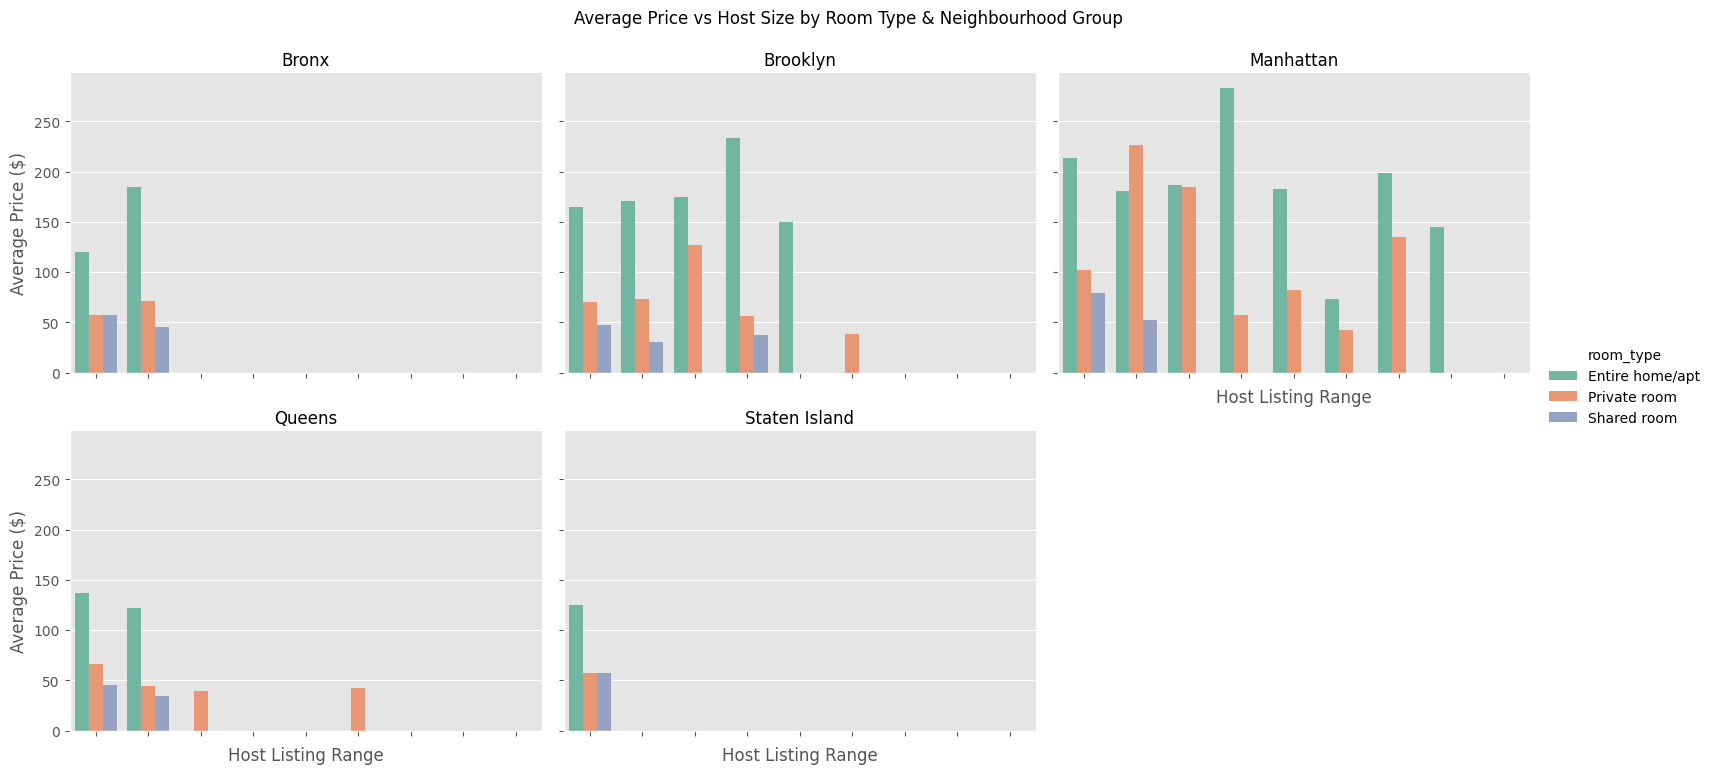

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count listings per host
host_listings = df['host_id'].value_counts().rename('host_listing_count')

# Step 2: Map back to DataFrame
df['host_listing_count'] = df['host_id'].map(host_listings)

# Step 3: Bin host sizes in steps of 10
df['host_range'] = pd.cut(df['host_listing_count'], 
                          bins=range(0, 100, 10),
                          right=True)

# Step 4: Group by host_range, room_type, and neighbourhood_group
grouped = df.groupby(['host_range', 'room_type', 'neighbourhood_group'], observed=True)['price'].mean().reset_index()

# Step 5: Plot using seaborn catplot (better hue + facet handling)
g = sns.catplot(
    data=grouped,
    kind='bar',
    x='host_range',
    y='price',
    hue='room_type',
    col='neighbourhood_group',
    col_wrap=3,
    height=4,
    aspect=1.3,
    palette='Set2',
    legend_out=True
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Host Listing Range", "Average Price ($)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Price vs Host Size by Room Type & Neighbourhood Group')
plt.show()


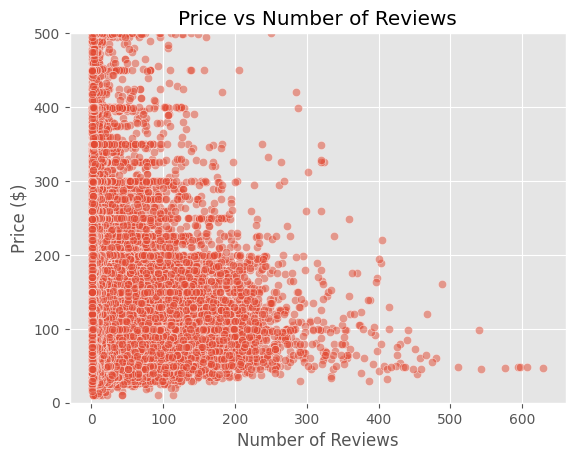

In [147]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.ylim(0, 500)  # limit to filter extreme outliers
plt.show()


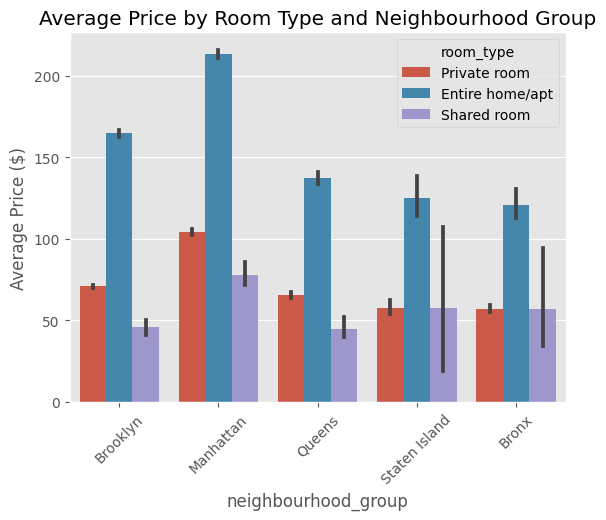

In [148]:
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


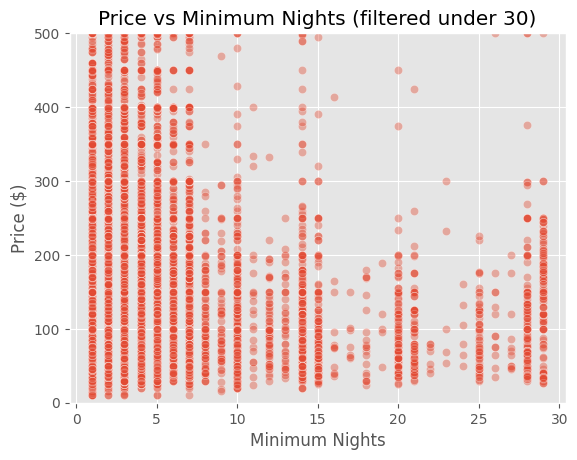

In [149]:
sns.scatterplot(data=df[df['minimum_nights'] < 30], x='minimum_nights', y='price', alpha=0.4)
plt.title('Price vs Minimum Nights (filtered under 30)')
plt.xlabel('Minimum Nights')
plt.ylabel('Price ($)')
plt.ylim(0, 500)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

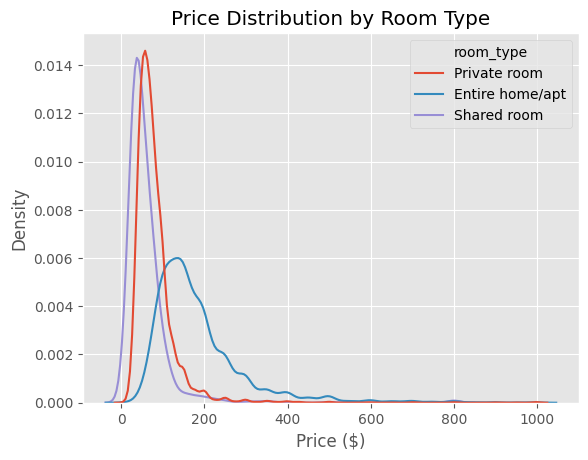

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x='price', hue='room_type', common_norm=False)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


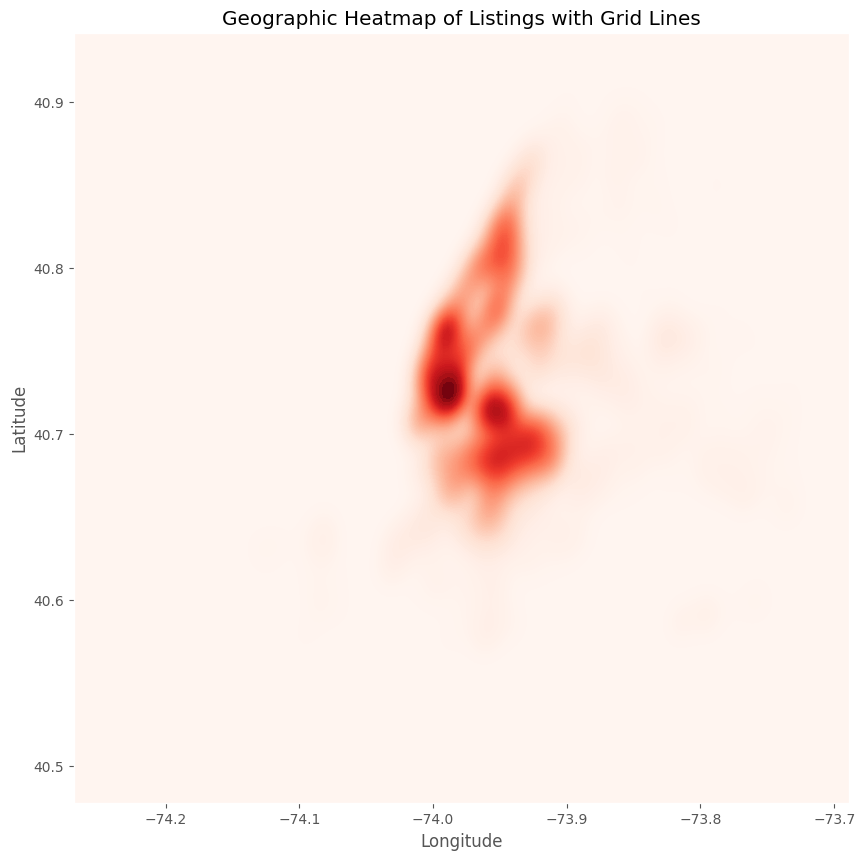

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# Plot KDE heatmap of listings (longitude vs latitude)
sns.kdeplot(
    x=df['longitude'],
    y=df['latitude'],
    fill=True,
    cmap='Reds',
    thresh=0,
    levels=100
)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5, color='gray')

plt.title('Geographic Heatmap of Listings with Grid Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


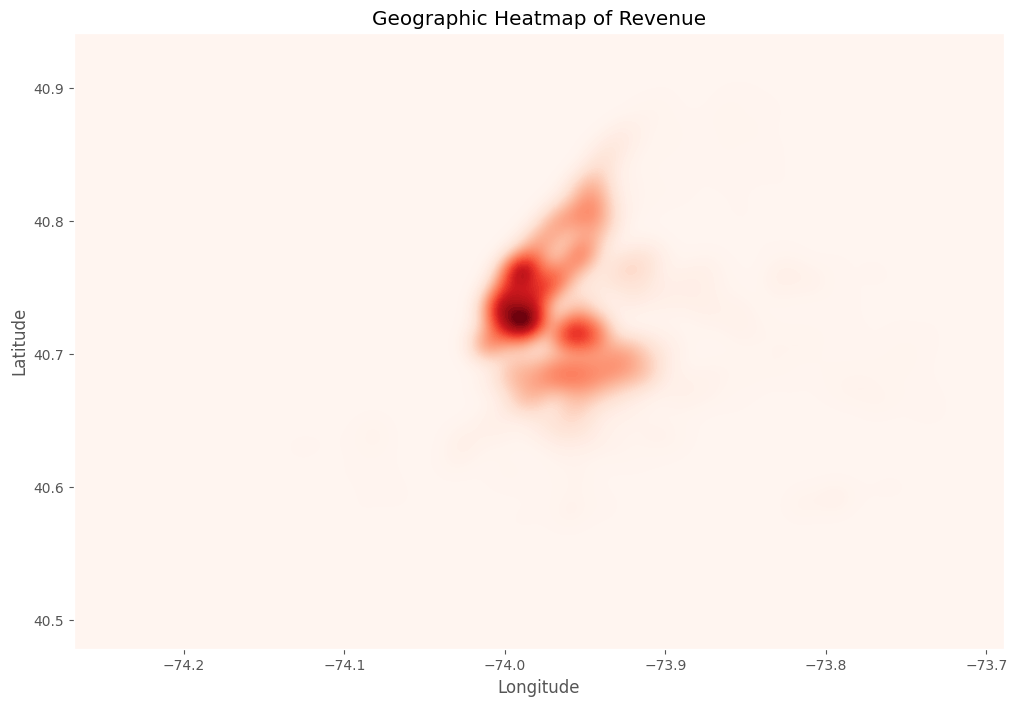

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=df['longitude'], 
    y=df['latitude'], 
    weights=df['price'],  # weight KDE by price
    fill=True, 
    cmap='Reds', 
    thresh=0,
    levels=100
)
plt.title('Geographic Heatmap of Revenue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


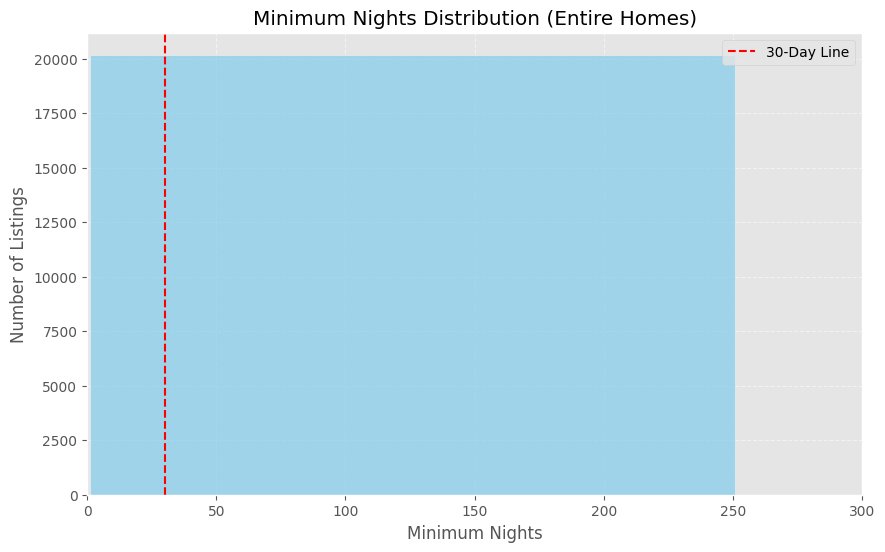

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


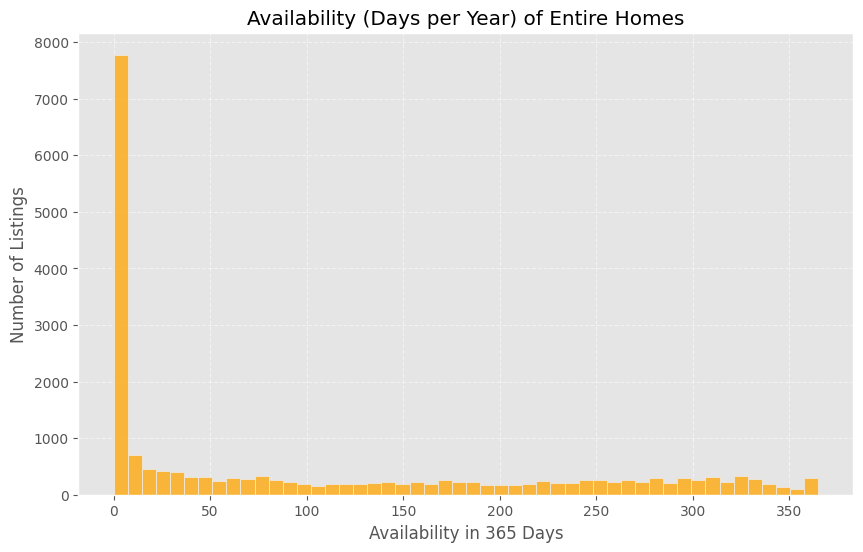

🔍 9.60% of entire home listings require a minimum stay of 30 nights or more.


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Entire home/apartment
entire_home_df = df[df['room_type'] == 'Entire home/apt']

# 1. Plot distribution of minimum nights (limited to 100 nights on x-axis)
plt.figure(figsize=(10, 6))
sns.histplot(entire_home_df['minimum_nights'], bins=5, color='skyblue')
plt.axvline(30, color='red', linestyle='--', label='30-Day Line')
plt.xlim(0, 300)  # Limit x-axis to 0–100
plt.title('Minimum Nights Distribution (Entire Homes)')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 2. Plot availability for entire homes
plt.figure(figsize=(10, 6))
sns.histplot(entire_home_df['availability_365'], bins=50, color='orange')
plt.title('Availability (Days per Year) of Entire Homes')
plt.xlabel('Availability in 365 Days')
plt.ylabel('Number of Listings')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Check how many entire homes have minimum_nights >= 30
long_term_only = entire_home_df[entire_home_df['minimum_nights'] >= 30]
percent_long_term = len(long_term_only) / len(entire_home_df) * 100

print(f"🔍 {percent_long_term:.2f}% of entire home listings require a minimum stay of 30 nights or more.")
